# Descriptive and Inferential Analysis

## Definitions
* E = Everyone
* ET = EVeryone 10+
* T = Teen
* M = Mature

Console:
* 0 = Playstation 4
* 1 = PS4 & Xbox One

The following are 0 = no, 1 = yes
* alcohol_reference	= Reference to and/or images of alcoholic beverages.
* animated_blood = Discolored and/or unrealistic depictions of blood.
* blood = Depcitions of blood.
* blood_and_gore = Depictions of blood or the mutilation of body parts.
* cartoon_violence = Violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted.
* crude_humor = Depictions or dialogue involving vulgar antics, including "bathroom" humor.
* drug_reference = Reference to and/or images of illegal drugs.
* fantasy_violence = Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.
* intense_violence = Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death.
* language = Moderate use of profanity.
* lyrics = References to profanity, sexuality, violence, alcohol, or drug use in music.
* mature_humor = Depictions or dialogue involving "adult" humor, including sexual references.
* mild_blood = Some blood.
* mild_cartoon_violence = Some violent actions involving cartoon.
* mild_fantasy_violence = Some violent actions of a fantasy nature.
* mild_language = Mild to moderate use of profanity.
* mild_lyrics = Mild References to profanity, sexuality, violence, alcohol, or drug use in music.
* mild_suggestive_themes = some provocative references or materials.
* mild_violence = Some scenes involving aggressive conflict.
* no_descriptors = No content descriptors.
* nudity = Graphic or prolonged depictions of nudity.
* partial_nudity = Brief and/or mild depictions of nudity.
* sexual_content = Non-explicit depictions of sexual behavior, possibly including partial nudity.
* sexual_themes = References to sex or sexuality.
* simulated_gambling = Player can gamble without betting or wagering real cash or currency.
* strong_language = Explicit and/or frequent use of profanity.
* strong_sexual_content = Explicit and/or frequent depictions of sexual behavior, possibly including nudity.
* suggestive_themes = Provocative references or materials.
* use_of_alcohol = The consumption of alcoholic beverages.
* use_of_drugs_and_alcohol = The consumption of alcoholic and drugs beverages.
* violence = Scenes involving aggressive conflict. May contain bloodless dismemberment.

For more information you can go to the [ESRB website](https://www.esrb.org/ratings-guide/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('data/esrb_ratings_scraped.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     12000 non-null  object
 1   console                   12000 non-null  object
 2   alcohol_reference         12000 non-null  int64 
 3   animated_blood            12000 non-null  int64 
 4   blood                     12000 non-null  int64 
 5   blood_and_gore            12000 non-null  int64 
 6   cartoon_violence          12000 non-null  int64 
 7   crude_humor               12000 non-null  int64 
 8   drug_reference            12000 non-null  int64 
 9   fantasy_violence          12000 non-null  int64 
 10  intense_violence          12000 non-null  int64 
 11  language                  12000 non-null  int64 
 12  mild_blood                12000 non-null  int64 
 13  mild_cartoon_violence     12000 non-null  int64 
 14  mild_fantasy_violence 

Check for null values.

In [3]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
nudity                      0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_language             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_rating                 0
dtype: int64

Looks pretty clean, given that most columns are binary

In [4]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Yars Rising,"PlayStation 5, Nintendo Switch",0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
1,STAR WARS™: Bounty Hunter™,"PlayStation 5, Nintendo Switch, Xbox Series",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
2,Tomb Raider I-III Remastered Starring Lara Croft,"Xbox One, Xbox Series",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
3,Mad Bullets,Nintendo Switch,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
4,Raiden NOVA,"PlayStation 5, Nintendo Switch",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET


Check which ratings are present in this dataset

In [5]:
df.esrb_rating.unique()

array(['ET', 'T', 'E', 'M'], dtype=object)

Just check for duplicates, since this is a smaller dataset and don't want to make it smaller

In [6]:
df[df.duplicated()]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
10,Yars Rising,"PlayStation 5, Nintendo Switch",0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
11,STAR WARS™: Bounty Hunter™,"PlayStation 5, Nintendo Switch, Xbox Series",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
12,Tomb Raider I-III Remastered Starring Lara Croft,"Xbox One, Xbox Series",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
13,Mad Bullets,Nintendo Switch,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
14,Raiden NOVA,"PlayStation 5, Nintendo Switch",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11671,Hidden Mysteries: Titanic,"Macintosh, Windows PC",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
11760,Digger HD,PlayStation 3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
11927,First Class Flurry,Windows PC,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
11947,G.H.O.S.T. Chronicles: Phantom of the Faire,Windows PC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [7]:
# create a function for making countplot graphs
def plot_counts(x, data):
    plt.figure(figsize=(8,8))
    sns.countplot(x=x, data=data)

    # Adding title and labels
    plt.title(f'Count of {x.capitalize()}', fontsize=16)
    plt.xlabel(f'{x.capitalize()}', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    plt.show()

____


## Descriptive Analysis


______

### What are the ratings represented in this dataset?

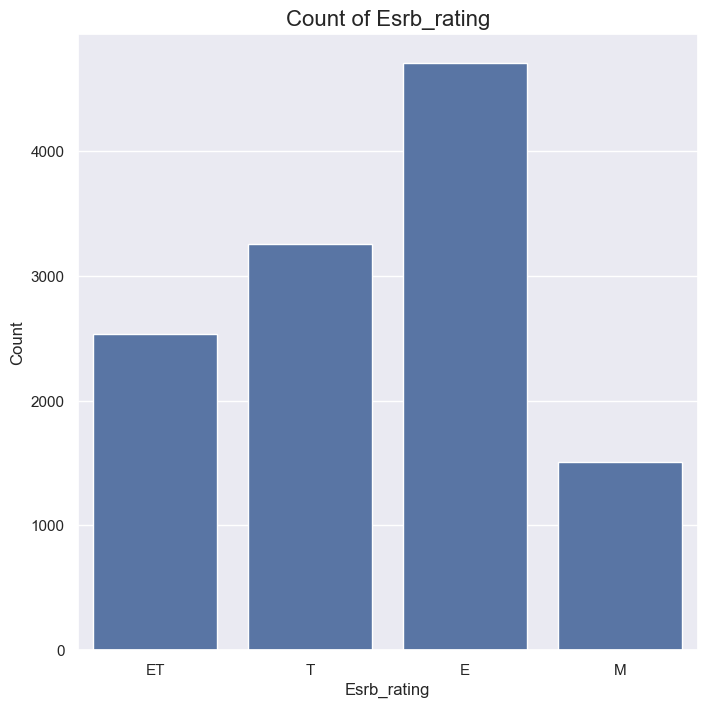

In [8]:
plot_counts('esrb_rating', df)

Mostly Everyone rated games. 

### How many violent video games are present in the dataset?

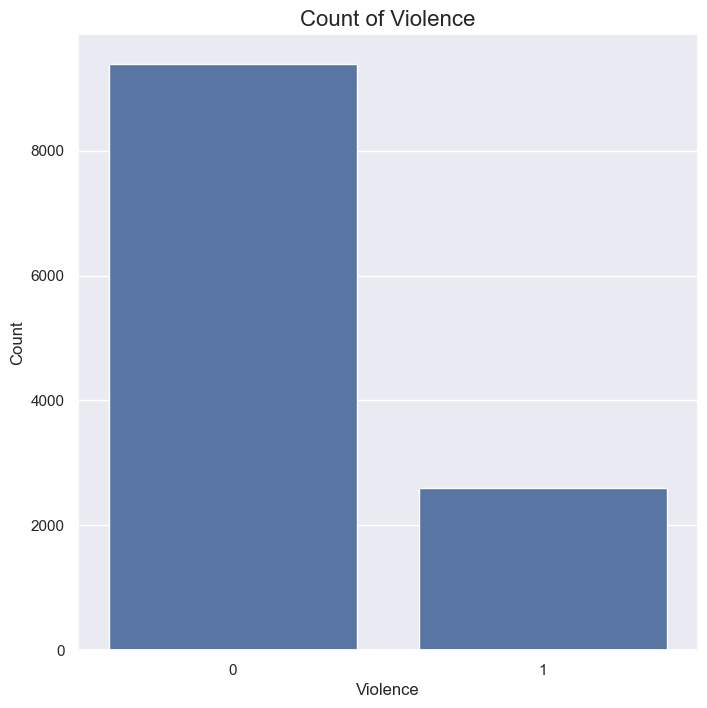

In [9]:
plot_counts('violence', df)

Let's check other types of violence

### How many games contain cartoon violence?

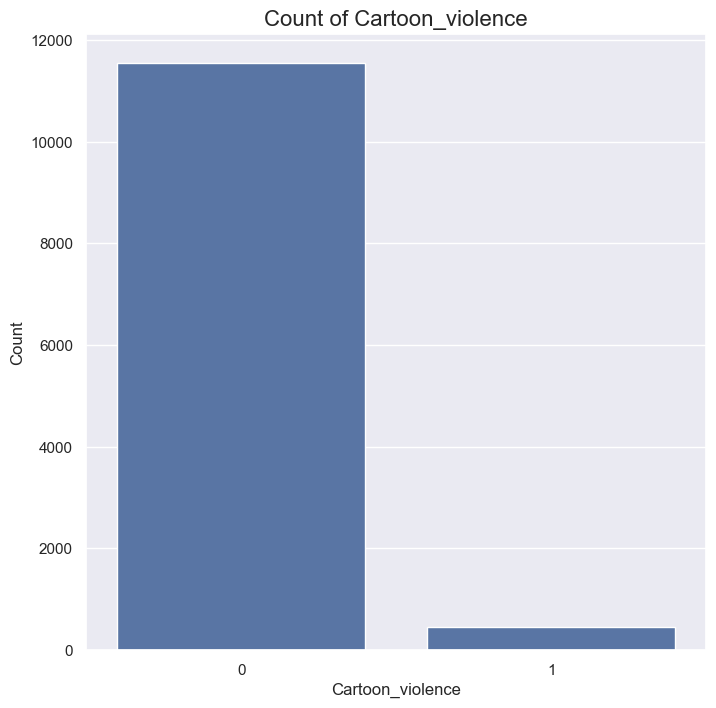

In [10]:
plot_counts('cartoon_violence', df)

### How many games contain fantasy violence?

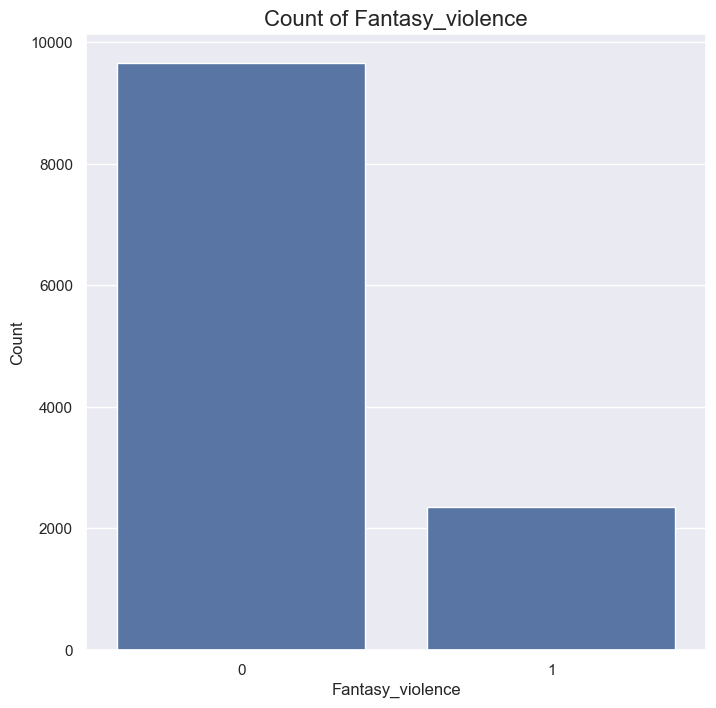

In [11]:
plot_counts('fantasy_violence', df)

So Violence is categorized differently throughout all the games. It might be good to show all violence categories to get a full count. 

### How is violence represented throughout entire dataset?

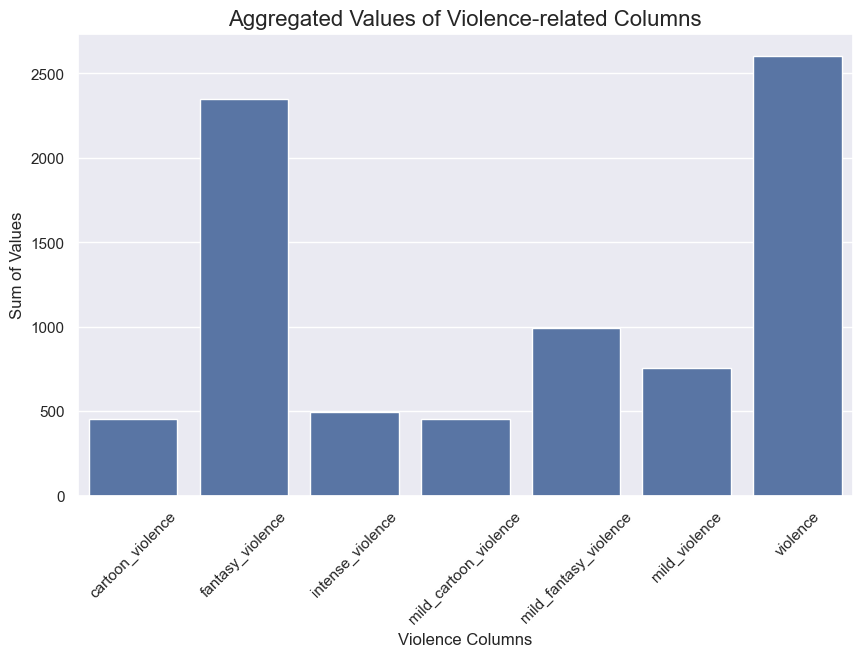

In [12]:
# Step 1: Select columns containing the word 'violence'
violence_columns = df.filter(like='violence')

# Step 2: Aggregate the values by summing up rows (or choose another aggregation method)
# If you want the sum of each column:
violence_aggregated = violence_columns.sum()

# Step 3: Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_aggregated.index, y=violence_aggregated.values)

# Adding title and labels
plt.title('Aggregated Values of Violence-related Columns', fontsize=16)
plt.xlabel('Violence Columns', fontsize=12)
plt.ylabel('Sum of Values', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [13]:
total_violence_count = violence_columns.sum().sum() #get sum for each column and then the sum of those sums

print(f"Total count across all 'violence' columns: {total_violence_count}")

Total count across all 'violence' columns: 8103


Now that number makes a lot more sense for violence throughout all games in this dataset. 

### Do E rated games contain any types of violence?

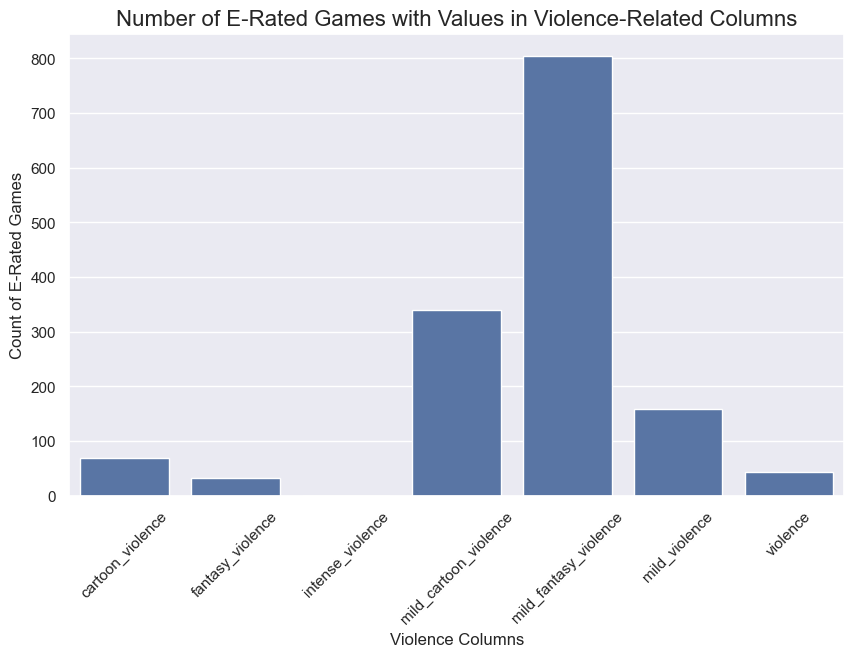

In [14]:
# Filter rows where the 'esrb_ratings' column is 'E'
e_rated_games = df[df['esrb_rating'] == 'E']

# Select columns containing the word 'violence'
violence_columns = e_rated_games.filter(like='violence')

# Step 3: Count how many E-rated games have non-zero values in each violence-related column
violence_counts = (violence_columns > 0).sum()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_counts.index, y=violence_counts.values)

# Adding title and labels
plt.title('Number of E-Rated Games with Values in Violence-Related Columns', fontsize=16)
plt.xlabel('Violence Columns', fontsize=12)
plt.ylabel('Count of E-Rated Games', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Are E rated games containing any drug or alcohol references?

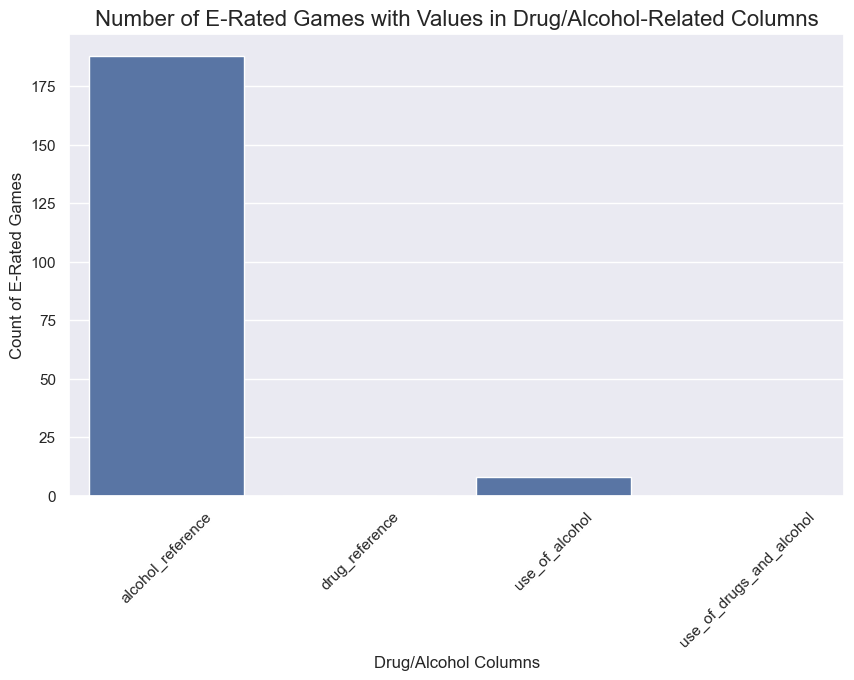

In [15]:
# Filter columns containing the words 'drug' or 'alcohol'
drug_alcohol_columns = e_rated_games.filter(regex='drug|alcohol', axis=1)

# Step 2: Count how many E-rated games have non-zero values in each drug/alcohol-related column
drug_alcohol_counts = (drug_alcohol_columns > 0).sum()

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_alcohol_counts.index, y=drug_alcohol_counts.values)

# Adding title and labels
plt.title('Number of E-Rated Games with Values in Drug/Alcohol-Related Columns', fontsize=16)
plt.xlabel('Drug/Alcohol Columns', fontsize=12)
plt.ylabel('Count of E-Rated Games', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [21]:
# Identify rows where any of the 'drug' or 'alcohol' columns have non-zero values
games_with_drug_or_alcohol = e_rated_games[drug_alcohol_columns.sum(axis=1) > 0]

# List the titles of those games
game_titles_with_drug_or_alcohol = games_with_drug_or_alcohol['title']

# Display the titles
if not game_titles_with_drug_or_alcohol.empty:
    print(f"Number of E-rated games with drug/alcohol-related content: {len(game_titles_with_drug_or_alcohol)}")
    print(game_titles_with_drug_or_alcohol)
else:
    print("No E-rated games with drug/alcohol-related content found.")

Number of E-rated games with drug/alcohol-related content: 196
53                             Harvest Days
137      Hidden Objects 6: Shopping Clutter
471                                Backbeat
506                                 Exo One
521                   Everybody 1-2-Switch!
                        ...                
11901                   THINK Logic Trainer
11906                   THINK Logic Trainer
11927                    First Class Flurry
11932                             Cook Wars
11990                    The Price is Right
Name: title, Length: 196, dtype: object


_____


## Inferential Analysis

_____

In [17]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

### Do games that feature animated blood have a higher probability of receiving an "M" (Mature) rating than games that do not?

Null Hypothesis (H0): There is no association between content descriptors (e.g., animated blood) and the ESRB rating.\
Alternative Hypothesis (HA): There is an association between content descriptors and the ESRB rating.

In [18]:
# significance level
alpha = 0.05

# Create a contingency table for 'animated_blood' and 'esrb_rating'
contingency_table = pd.crosstab(df['animated_blood'], df['esrb_rating'])

# Run the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation: If p-value < 0.05, reject the null hypothesis
if p < alpha:
    print("Reject the Null: There is a significant association between animated_blood and esrb_rating.")
else:
    print("Unable to reject the null")

Chi-Square Statistic: 205.7069752350321
P-Value: 2.4658036960240257e-44
Reject the Null: There is a significant association between animated_blood and esrb_rating.


### Is there a significant difference in the mean number of content descriptors across different ESRB ratings?

Null Hypothesis (H0): The mean number of content descriptors is the same for all ESRB rating categories.\
Alternative Hypothesis (HA): At least one ESRB rating category has a mean number of content descriptors that is different from the others.

In [19]:
# significance level
alpha = 0.05

# Calculate the number of content descriptors by summing relevant columns
content_descriptor_columns = df.columns.drop(['title', 'console', 'esrb_rating'])
df['content_descriptor_count'] = df[content_descriptor_columns].sum(axis=1)

# Group the content descriptor counts by ESRB rating
grouped_data = [df[df['esrb_rating'] == rating]['content_descriptor_count'] for rating in df['esrb_rating'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*grouped_data)

# Display the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the Null: There is a significant difference in the mean number of content descriptors across ESRB ratings.")
else:
    print("Unable to reject the null")

F-Statistic: 5894.922143499814
P-Value: 0.0
Reject the Null: There is a significant difference in the mean number of content descriptors across ESRB ratings.


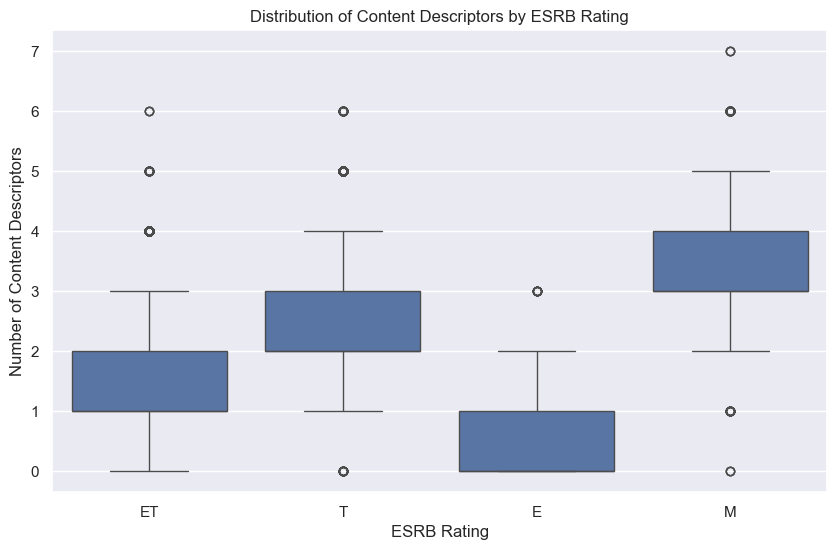

In [20]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of content descriptors by ESRB rating
sns.boxplot(x='esrb_rating', y='content_descriptor_count', data=df)

# Set plot labels and title
plt.title('Distribution of Content Descriptors by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Number of Content Descriptors')

# Show the plot
plt.show()

This graph makes sense in how these should be distributed. The only issue that might arise is how some ET games have an amount of descriptors close to Teen rated. Also, Some of the Mature games have pretty few descriptors. This could be because the descriptor itself is a big one.